### Abstract

In statistics, hyperparameter is a parameter from a prior distribution; it captures the prior belief before data is observed.
In any machine learning algorithms, these parameters need to be initialized before training a model.
Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model which is being trained.
Our aim is to find proper hyperparameter with proper tuning for our dataset which would help the database team in modelling the database schema in an efficient way. We would create H2O models for this dataset for getting proper hyperparameters.

### Background research

Hyperparameters: In machine learning, we use the term hyperparameter to distinguish from standard model parameters. A machine learning model is the definition of a mathematical formula with a number of parameters that need to be learned from the data. That is the crux of machine learning: fitting a model to the data. This is done through a process known as model training. In other words, by training a model with existing data, we are able to fit the model parameters.

H2O: H2O is java based softwaere for data modelling and general computing. The goal of H2O is to allow simple horizontal scaling to a given problem in order to produce a solution faster. H2O uses a distributed key-value store (the “DKV”) that contains pointers to the various objects of the H2O ecosystem. Some shared objects are mutable by the client; some shared objects are read-only by the client, but are mutable by H2O (e.g. a model being constructed will change over time); and actions by the client may have side-effects on other clients (multi-tenancy is not a supported model of use, but it is possible for multiple clients to attach to a single H2O cloud).

### Acknowledgement

Source: All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

### Importing libraries

In [99]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h2o
import pandas_profiling
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold

In [100]:
#ignoring the warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

### Finding important hyperparameters and their ranges

For GBM Model

In [101]:
# importing the dataset
gbm_df = pd.read_csv("GBM_Algo.csv")

In [102]:
gbm_df.head()

,model_id,nfolds,max_after_balance_size,max_confusion_matrix_size,max_hit_ratio_k,ntrees,max_depth,min_rows,nbins,nbins_top_level,...,learn_rate,learn_rate_annealing,distribution,quantile_alpha,tweedie_power,huber_alpha,min_split_improvement,histogram_type,pred_noise_bandwidth,categorical_encoding
0,GBM_1_AutoML_20190418_163635,5,5,20,0,86,15,100,20,1024,...,0.1,1,gaussian,0.5,1.5,0.9,0.00001,AUTO,0,AUTO
1,GBM_3_AutoML_20190418_163635,5,5,20,0,86,15,100,20,1024,...,0.1,1,gaussian,0.5,1.5,0.9,0.00001,AUTO,0,AUTO
2,GBM_5_AutoML_20190418_163635,5,5,20,0,86,15,100,20,1024,...,0.1,1,gaussian,0.5,1.5,0.9,0.00001,AUTO,0,AUTO
3,GBM_4_AutoML_20190418_163635,5,5,20,0,86,15,100,20,1024,...,0.1,1,gaussian,0.5,1.5,0.9,0.00001,AUTO,0,AUTO
4,GBM_2_AutoML_20190418_163635,5,5,20,0,86,15,100,20,1024,...,0.1,1,gaussian,0.5,1.5,0.9,0.00001,AUTO,0,AUTO


In [103]:
# Checking for null values
gbm_df.isnull().values.any()

False

In [104]:
gbm_df.dtypes

model_id                      object
nfolds                         int64
max_after_balance_size         int64
max_confusion_matrix_size      int64
max_hit_ratio_k                int64
ntrees                         int64
max_depth                      int64
min_rows                       int64
nbins                          int64
nbins_top_level                int64
nbins_cats                     int64
stopping_rounds                int64
stopping_metric               object
stopping_tolerance           float64
seed                         float64
learn_rate                   float64
learn_rate_annealing           int64
distribution                  object
quantile_alpha               float64
tweedie_power                float64
huber_alpha                  float64
min_split_improvement        float64
histogram_type                object
pred_noise_bandwidth           int64
categorical_encoding          object
dtype: object

In [105]:
pandas_profiling.ProfileReport(gbm_df)

Number of variables,25
Number of observations,78
Total Missing (%),0.0%
Total size in memory,15.3 KiB
Average record size in memory,201.0 B
Numeric,5
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,18


In [106]:
ranges = []
for key,val in gbm_df.dtypes.items():
    print(key,val)
    if val == 'int': 
         ranges.append([key,[gbm_df[key].min(),gbm_df[key].max()]])
    if val == 'float':
         ranges.append([key,[gbm_df[key].min(),gbm_df[key].max()]])

model_id object
nfolds int64
max_after_balance_size int64
max_confusion_matrix_size int64
max_hit_ratio_k int64
ntrees int64
max_depth int64
min_rows int64
nbins int64
nbins_top_level int64
nbins_cats int64
stopping_rounds int64
stopping_metric object
stopping_tolerance float64
seed float64
learn_rate float64
learn_rate_annealing int64
distribution object
quantile_alpha float64
tweedie_power float64
huber_alpha float64
min_split_improvement float64
histogram_type object
pred_noise_bandwidth int64
categorical_encoding object


In [107]:
ranges

[['stopping_tolerance', [0.006802091999999999, 0.006802091999999999]],
 ['seed', [-8.3e+18, 8.8e+18]],
 ['learn_rate', [0.001, 0.5]],
 ['quantile_alpha', [0.5, 0.5]],
 ['tweedie_power', [1.5, 1.5]],
 ['huber_alpha', [0.9, 0.9]],
 ['min_split_improvement', [1e-05, 0.0001]]]

### Plotting correlation to find important hyperparameters

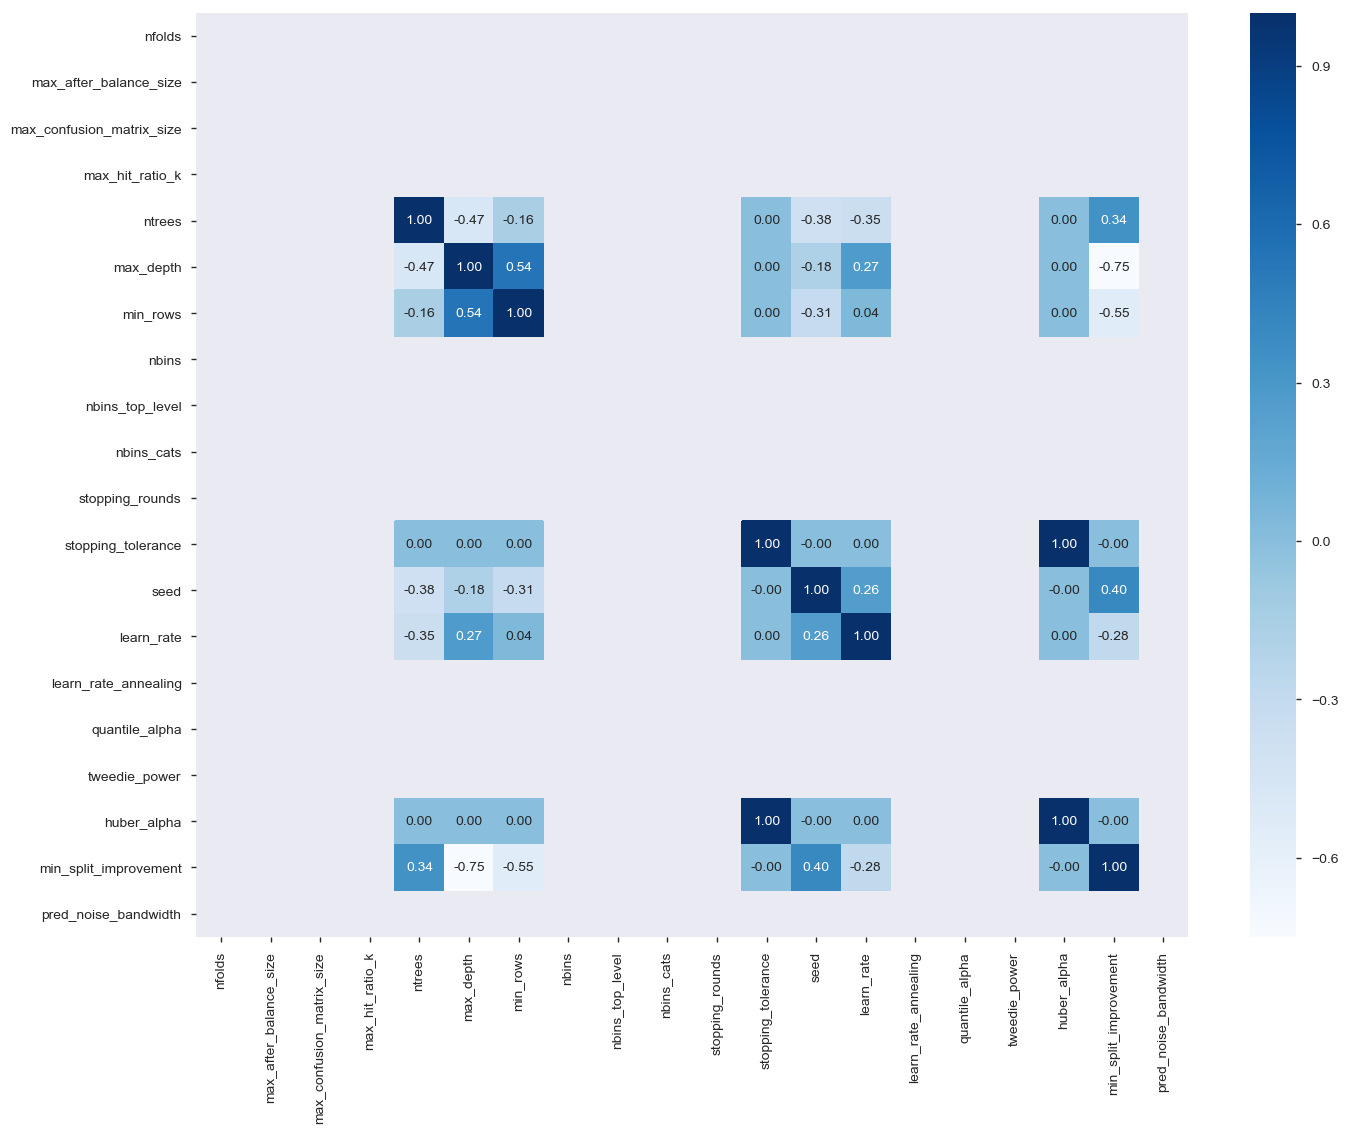

In [108]:
plt.figure(figsize=(16,12))
cor = sns.heatmap(data=gbm_df.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

Min_rows and Max_depth has the greatest correlation value amongst other variables.n_trees also has good correlation value which can say it is a significant hyperparameter.

### deep learning

In [115]:
# importing the dataset
deep_learning = pd.read_csv("Deep_Learning.csv")

In [116]:
deep_learning.dtypes

model_id                             object
nfolds                                int64
fold_assignment                      object
max_after_balance_size                int64
max_confusion_matrix_size             int64
max_hit_ratio_k                       int64
standardize                            bool
activation                           object
epochs                              float64
train_samples_per_iteration           int64
seed                                float64
rho                                 float64
epsilon                             float64
rate                                float64
rate_annealing                      float64
rate_decay                            int64
momentum_start                        int64
momentum_ramp                         int64
l1                                    int64
l2                                    int64
max_w2                              float64
initial_weight_distribution          object
initial_weight_scale            

In [117]:
param_ranges = []
for key,val in deep_learning.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[deep_learning[key].min(),deep_learning[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[deep_learning[key].min(),deep_learning[key].max()]])

model_id object
nfolds int64
fold_assignment object
max_after_balance_size int64
max_confusion_matrix_size int64
max_hit_ratio_k int64
standardize bool
activation object
epochs float64
train_samples_per_iteration int64
seed float64
rho float64
epsilon float64
rate float64
rate_annealing float64
rate_decay int64
momentum_start int64
momentum_ramp int64
l1 int64
l2 int64
max_w2 float64
initial_weight_distribution object
initial_weight_scale int64
loss object
quantile_alpha float64
tweedie_power float64
score_interval int64
huber_alpha float64
score_training_samples int64
score_validation_samples int64
score_duty_cycle float64
stopping_rounds int64
stopping_metric object
stopping_tolerance float64
max_runtime_secs int64
score_validation_sampling object
diagnostics bool
fast_mode bool
force_load_balance bool
variable_importances bool
single_node_mode bool
quiet_mode bool
autoencoder bool
sparse bool
col_major bool
average_activation int64
sparsity_beta int64
reproducible object
export_weig

In [118]:
param_ranges

[['nfolds', [5, 5]],
 ['max_after_balance_size', [5, 5]],
 ['max_confusion_matrix_size', [20, 20]],
 ['max_hit_ratio_k', [0, 0]],
 ['epochs', [0.23547161, 17.61201577]],
 ['train_samples_per_iteration', [-2, -2]],
 ['seed', [-7.09e+18, 9e+18]],
 ['rho', [0.9, 0.99]],
 ['epsilon', [1e-09, 1e-06]],
 ['rate', [0.005, 0.005]],
 ['rate_annealing', [1e-06, 1e-06]],
 ['rate_decay', [1, 1]],
 ['momentum_start', [0, 0]],
 ['momentum_ramp', [1000000, 1000000]],
 ['l1', [0, 0]],
 ['l2', [0, 0]],
 ['max_w2', [3.4000000000000003e+38, 3.4000000000000003e+38]],
 ['initial_weight_scale', [1, 1]],
 ['quantile_alpha', [0.5, 0.5]],
 ['tweedie_power', [1.5, 1.5]],
 ['score_interval', [5, 5]],
 ['huber_alpha', [0.9, 0.9]],
 ['score_training_samples', [10000, 10000]],
 ['score_validation_samples', [0, 0]],
 ['score_duty_cycle', [0.1, 0.1]],
 ['stopping_rounds', [0, 0]],
 ['stopping_tolerance', [0.006802091999999999, 0.006802091999999999]],
 ['max_runtime_secs', [0, 0]],
 ['average_activation', [0, 0]],
 ['s

### finding important hyperparameter

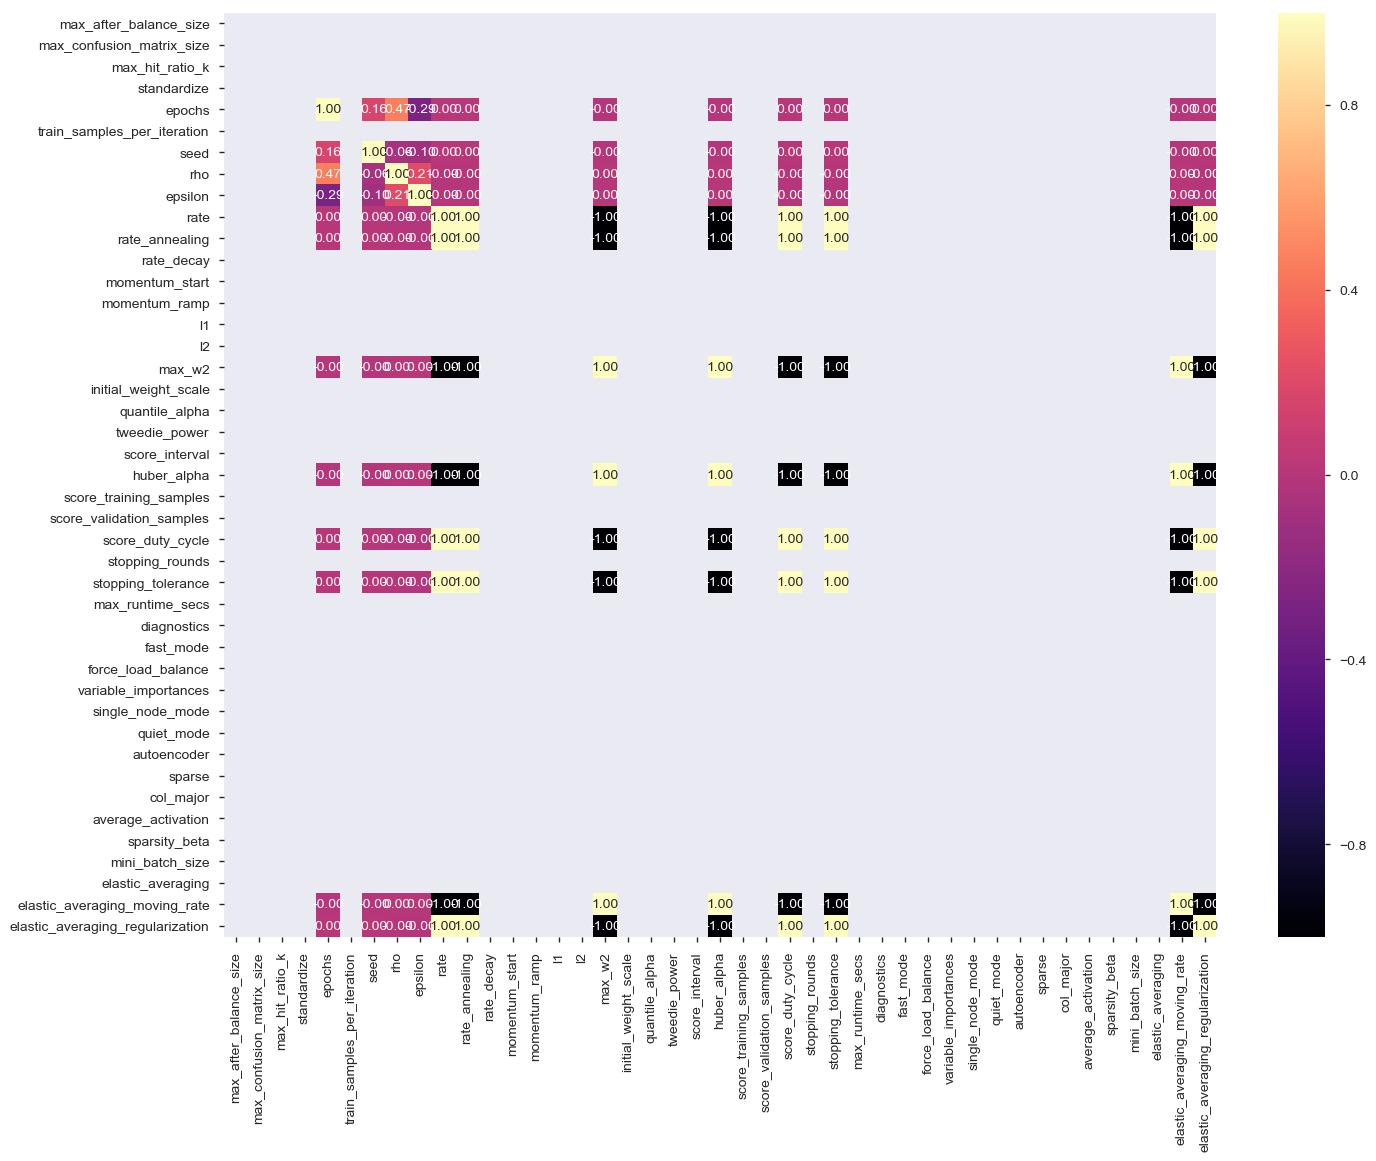

In [123]:
plt.figure(figsize=(16,12))
sns.heatmap(data=deep_learning.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='magma')
plt.show()

We can see that the correlation values for huber_alpha, max_w2, stopping tolerance, elastic_averaging_regularization are the significant hyperparameters for deep learning model

### DRF algorithm

In [124]:
# importing the dataset
drf = pd.read_csv("DRF_Algo.csv")

In [125]:
drf.head()

,model_id,nfolds,score_tree_interval,fold_assignment,balance_classes,max_after_balance_size,max_hit_ratio_k,ntrees,max_depth,min_rows,...,stopping_rounds,stopping_metric,stopping_tolerance,seed,mtries,sample_rate,min_split_improvement,histogram_type,categorical_encoding,distribution
0,DRF_1_AutoML_20190418_162739,5,0,modulo,False,5,0,50,20,1,...,0,AUTO,0.006802,1.040000e+18,-1,0.632,0.00001,AUTO,AUTO,gaussian
1,DRF_1_AutoML_20190418_162739,5,0,modulo,False,5,0,50,20,1,...,0,AUTO,0.006802,1.040000e+18,-1,0.632,0.00001,AUTO,AUTO,gaussian
2,DRF_1_AutoML_20190418_163635,5,0,modulo,False,5,0,34,20,1,...,0,AUTO,0.006802,-8.830000e+18,-1,0.632,0.00001,AUTO,AUTO,gaussian
3,DRF_1_AutoML_20190418_163862,5,0,modulo,False,5,0,50,20,1,...,0,AUTO,0.006802,1.040000e+18,-1,0.632,0.00001,AUTO,AUTO,gaussian
4,DRF_1_AutoML_20190418_165439,5,0,modulo,False,5,0,42,20,1,...,0,AUTO,0.006802,6.810000e+17,-1,0.632,0.00001,AUTO,AUTO,gaussian


In [126]:
drf.dtypes

model_id                   object
nfolds                      int64
score_tree_interval         int64
fold_assignment            object
balance_classes              bool
max_after_balance_size      int64
max_hit_ratio_k             int64
ntrees                      int64
max_depth                   int64
min_rows                    int64
nbins                       int64
nbins_top_level             int64
nbins_cats                  int64
stopping_rounds             int64
stopping_metric            object
stopping_tolerance        float64
seed                      float64
mtries                      int64
sample_rate               float64
min_split_improvement     float64
histogram_type             object
categorical_encoding       object
distribution               object
dtype: object

## Finding ranges 

In [127]:
param_ranges = []
for key,val in drf.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[drf[key].min(),drf[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[drf[key].min(),drf[key].max()]])

model_id object
nfolds int64
score_tree_interval int64
fold_assignment object
balance_classes bool
max_after_balance_size int64
max_hit_ratio_k int64
ntrees int64
max_depth int64
min_rows int64
nbins int64
nbins_top_level int64
nbins_cats int64
stopping_rounds int64
stopping_metric object
stopping_tolerance float64
seed float64
mtries int64
sample_rate float64
min_split_improvement float64
histogram_type object
categorical_encoding object
distribution object


In [128]:
param_ranges

[['nfolds', [5, 5]],
 ['score_tree_interval', [0, 0]],
 ['max_after_balance_size', [5, 5]],
 ['max_hit_ratio_k', [0, 0]],
 ['ntrees', [34, 50]],
 ['max_depth', [20, 20]],
 ['min_rows', [1, 1]],
 ['nbins', [20, 20]],
 ['nbins_top_level', [1024, 1024]],
 ['nbins_cats', [1024, 1024]],
 ['stopping_rounds', [0, 0]],
 ['stopping_tolerance', [0.006802091999999999, 0.006802091999999999]],
 ['seed', [-8.83e+18, 1.96e+18]],
 ['mtries', [-1, -1]],
 ['sample_rate', [0.632000029, 0.632000029]],
 ['min_split_improvement', [1e-05, 1e-05]]]

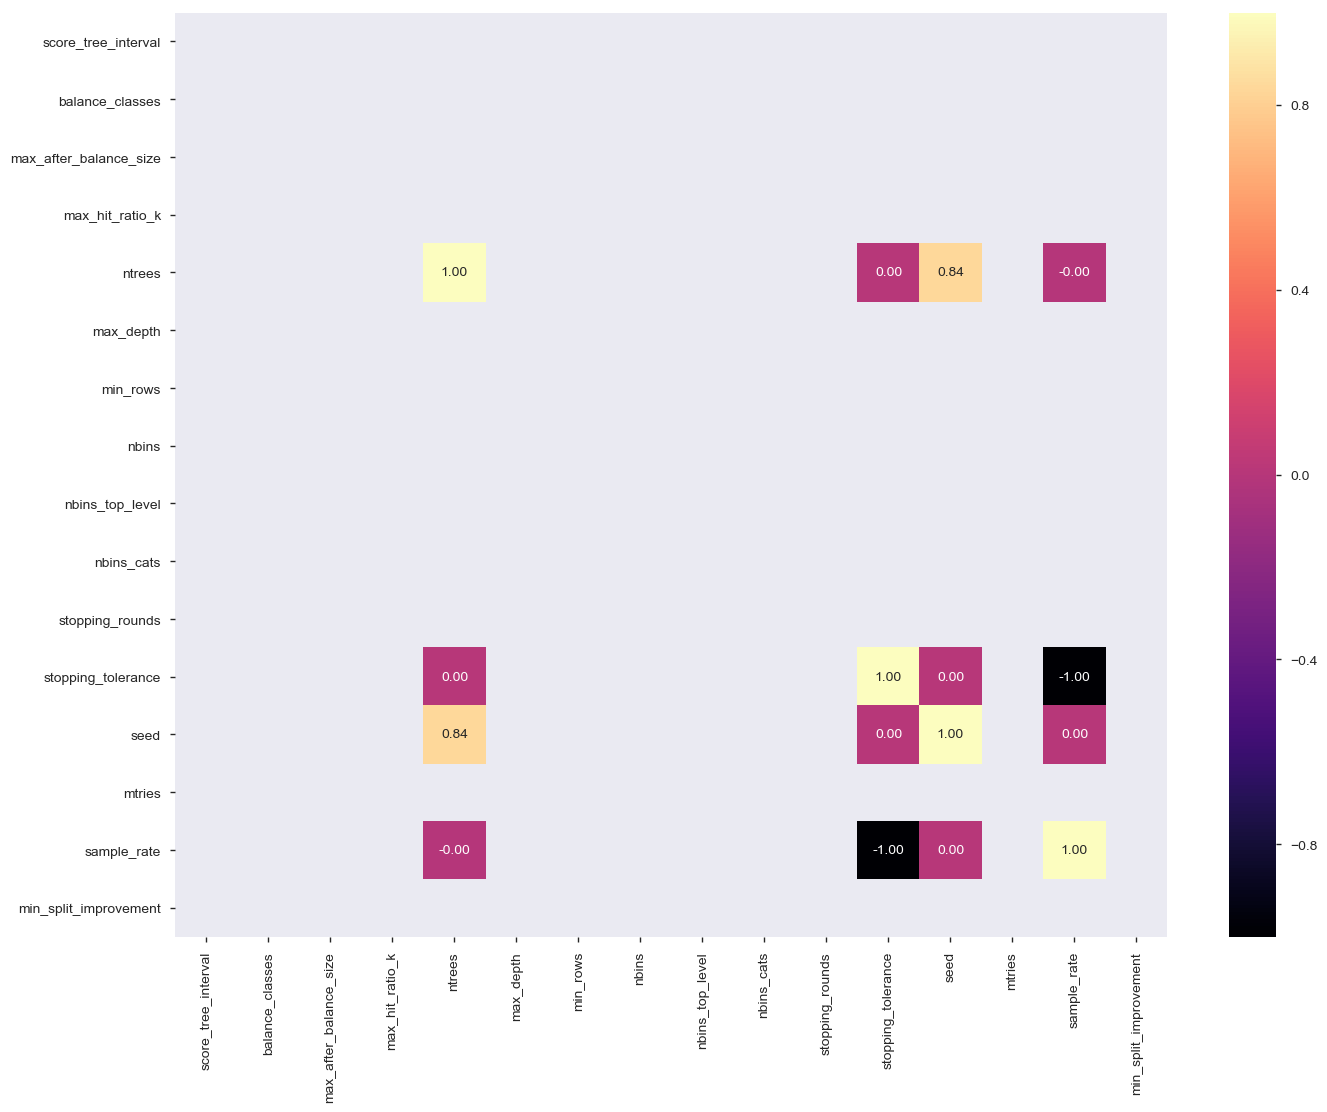

In [130]:
plt.figure(figsize=(16,12))
sns.heatmap(data=drf.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='magma')
plt.show()

From the above plot we can see that the correlation value for ntrees, seed and stopping_tolerance is the maximum

### Grid Search

In [240]:
import h2o
from h2o.automl import H2OAutoML

In [241]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [242]:
# importing the dataset
df = pd.read_csv("BlackFriday.csv")

In [243]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [244]:

X = df.columns
y= "Purchase"




In [ ]:
x=df.drop(columns=['Purchase'])

In [245]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df, test_size=0.2)

In [246]:
gbm_params = {
 'stopping_tolerance': [0.006802091999999999, 0.006802091999999999],
 'learn_rate': [0.001, 0.5],
 'quantile_alpha': [0.5, 0.5],
 'tweedie_power': [1.5, 1.5],
 'huber_alpha': [0.9, 0.9],
'seed':[-8.3e+18, 8.8e+18],
  'min_split_improvement': [1e-05, 0.0001]  
}

In [247]:
gbm_search = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_search',
                          hyper_params=gbm_params)

In [248]:
gbm_grid1.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=0.5)

AttributeError: 'DataFrame' object has no attribute 'names'

### Citations

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#grid-search-in-python
http://university.h2o.ai/data-science-101/lesson1.html
https://stat.ethz.ch/R-manual/R-devel/library/base/html/scale.html
https://www.jeremyjordan.me/hyperparameter-tuning/
https://github.com/prabhuSub/Hyperparamter-Samples/blob/master/Hyperparameter_Generated/PUBGDataset_1000_Hyperparameter_Generated.ipynb
https://www.h2o.ai/
https://en.wikipedia.org/wiki/H2O_(software)
http://docs.h2o.ai/
http://h2o-release.s3.amazonaws.com/h2o/master/3474/docs-website/h2o-py/docs/intro.html
https://towardsdatascience.com/h2o-for-inexperienced-users-7bc064124264
https://medium.com/@elutins/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

# Licence

Copyright 2019 VRUSHALI BANDALE, AISHWARYA GAIKWAD, CHINMAY AROLKAR

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Conclusion

In this project I ran H2O for 5 runtimes 500,1000,1500,2000 and 2500 got the best models which gave the best results. Stored them in the csv and stored their hyperparameters in the json files. I found the ranges of the hyperparameters of each algorithm. GBM algorithm had the most models that got generated.
For GBM ntrees, learning rate,stopping tolerence are the best hyperparameters.
For XRT sample rate and stopping tolerence are the best hyperparameters.
For DRF sample rate, stopping tolerence, seed and ntrees are the best hyperparameters.
For Deep Learning stopping_tolerence, rate, maxw2, huberalpha, elastic averaging moving rate and averaging regularization are the best hyperparameters.